## Background
This project implements multiple different loss functions and their gradient descents and compares the accuracy between them after mini-batch GD in the second part.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 1.1 - Comparing classifiers using gradient descent

The first part is the linear projection part (i.e., reduce to a single dimension) that can be formalized as $\hat{z} = \theta^T \mathbf{x}$, where $\mathbf{x} \in \mathbb{R}^{d+1}$ is a instance vector of length $d$ where we concatenate with a 1 to account for the intercept/bias term.

The second part is applying a loss function $\ell(y,\hat{z})$ that computes a loss given the true label $y$ and a predicted "score" $z\in\mathbb{R}$ from the first step.

1. $\ell(y,\hat{z}) = (y-\hat{z})^2$ (Squared error used in ordinary least squared linear regression)
2. $\ell(y,\hat{z}) = -y \log \sigma(\hat{z}) - (1-y)\log (1-\sigma(\hat{z}))$ (Logistic regression loss)
3. $\ell(y,\hat{z}) = \max \{0, 1-(2y-1)\hat{z}\}$ (Hinge loss of support vector machines (SVM) modified for $y\in \{0,1\}$)

The gradients for each of these w.r.t. a single sample $\mathbf{x}$ is implemented in the `gradient` method:

1. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = 2(y-\theta^T\mathbf{x})(-\mathbf{x}) = -2(y-\theta^T\mathbf{x})\mathbf{x}$
2. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = -(y-\sigma(\theta^T\mathbf{x})) \mathbf{x}$
3. $\nabla_{\theta} \ell(y, \theta^T \mathbf{x}) = \begin{cases} -(2y-1)\mathbf{x}, & \text{if } (2y-1)\theta^T\mathbf{x} < 1 \\ \textbf{0}, & \text{otherwise} \end{cases}$

Finally, for each loss function, there is a different threshold for $\hat{z}$ to predict class 1 vs class 0 given only $\hat{z}$ for each loss function, which should be implemented in the `predict` method:

1. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0.5 \\ 0, & \text{otherwise} \end{cases}$
2. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0, \text{ (or equivalently } \sigma(\hat{z}) \geq 0.5 \text{)} \\ 0, & \text{otherwise} \end{cases}$
3. $\hat{y} = \begin{cases} 1, & \text{if } \hat{z} \geq 0 \\ 0, & \text{otherwise} \end{cases}$

In [ ]:
class SquaredError():
    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        return np.mean((y - X.dot(theta))**2)

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        return -2 * X.T.dot(y - X.dot(theta)) / X.shape[0]

    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        return (X.dot(theta) >= 0.5)


class LogisticLoss():
    def __init__(self):
        self.sigmoid = lambda x: 1 / (1 + np.exp(-x))

    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        return np.mean(-y * np.log(self.sigmoid(X.dot(theta))) - (1 - y) * np.log(1 - self.sigmoid(X.dot(theta))))

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        return -X.T.dot(y - self.sigmoid(X.dot(theta))) / X.shape[0]

    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        return (self.sigmoid(X.dot(theta)) >= 0.5)


class HingeLoss():
    def __call__(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - scalar value of average loss
        """
        return np.mean(np.maximum(0, 1 - (2 * y - 1) * X.dot(theta)))

    def gradient(self, theta, X, y):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix
            - y: Array of shape (n,), the label vector

        Returns:
            - Array of shape (D+1,), the gradient vector
        """
        return -X.T.dot(((2 * y - 1) * X.dot(theta) < 1).astype(int) * (2 * y - 1)) / X.shape[0]


    def predict(self, theta, X):
        """
        Inputs:
            - theta: Array of shape (D+1,), the parameter vector
            - X: Array of shape (n, D+1), the input value matrix

        Returns:
            - Array of shape (n,), the predictions vector
        """
        return (X.dot(theta) >= 0)


In [ ]:
X, y = load_iris(return_X_y=True)

X = X[y<2]
y = y[y<2]
n, D = X.shape

X = np.concatenate((X, np.ones((n, 1))), axis=1)
rng = np.random.RandomState(0)
theta = rng.randn(D + 1)

# Evaluation
for f in [SquaredError(), LogisticLoss(), HingeLoss()]:
    loss = f(theta, X, y)
    grad = f.gradient(theta, X, y)
    idx = [1,2,3,-1,-2,-3]
    pred = f.predict(theta, X[idx, :])
    print(f"{f.__class__.__name__} : {loss}")
    print(f"Gradient: {grad}")
    print("Predictions for first 3 and last 3 (might be all 1s): ", pred.astype(int) )
    print(f"Gradient shape correct? {np.all(grad.shape == theta.shape)}")
    print(f"Prediction shape correct? {len(pred.shape) == 1 and np.all(pred.shape[0] == len(idx))}\n")

### Expected Output ###
# SquaredError : 292.4113612618828
# LogisticLoss : 7.026159389881265
# HingeLoss : 7.5261588020565435
# Gradient: [2.503 1.714 0.731 0.123 0.5  ]


SquaredError : 292.4113612618828
Gradient: [187.70580338 103.04596836 104.78651652  29.75120029  33.64057398]
Predictions for first 3 and last 3 (might be all 1s):  [1 1 1 1 1 1]
Gradient shape correct? True
Prediction shape correct? True

LogisticLoss : 7.026159389881265
Gradient: [2.50299722 1.71399812 0.73099919 0.12299988 0.49999941]
Predictions for first 3 and last 3 (might be all 1s):  [1 1 1 1 1 1]
Gradient shape correct? True
Prediction shape correct? True

HingeLoss : 7.5261588020565435
Gradient: [2.503 1.714 0.731 0.123 0.5  ]
Predictions for first 3 and last 3 (might be all 1s):  [1 1 1 1 1 1]
Gradient shape correct? True
Prediction shape correct? True



## 1.2 - Implement mini-batch GD and Visualize Accuracy

In [ ]:
def shuffle_and_batch(X, y, batch_size, rng):
    """Splits both X and y into nearly equal batches"""
    assert X.shape[0] == y.shape[0], 'X and y should have the same number of elements'
    # Shuffle data
    shuffled_idx = rng.permutation(X.shape[0])
    X = X[shuffled_idx, :]
    y = y[shuffled_idx]
    # Split into batches based on batch_size
    X_batches = np.asarray(np.array_split(X, np.ceil(X.shape[0] / batch_size), axis=0))
    y_batches = np.asarray(np.array_split(y, np.ceil(y.shape[0] / batch_size), axis=0))
    return X_batches, y_batches

In [ ]:
def optimize(theta_init, X_raw, y_raw, obj_func, step_size=1,
             max_epoch=100, batch_size=None, rng = None):
    obj_arr = []
    acc_arr = []
    batch_size = batch_size if batch_size is not None else len(X_raw)

    if rng is None:
        rng = np.random.RandomState(42)

    theta = theta_init.copy()
    best_acc = 0
    best_theta = theta
    for i in range(max_epoch): # epoch
        # Create list of batches for both X and y,
        # X_batches[0] has shape (batch_size, D) and y_batches[0] has shape (batch_size,)
        X_batches, y_batches = shuffle_and_batch(X_raw, y_raw, batch_size, rng)

        loss_for_each_epoch = 0 # total loss for the epoch
        num_correct = 0 # number of correct predictions for the epoch
        # Loop through batches, update theta, and keep a running loss and running count of correct to calculate average loss and accuracy after each epoch
        for X, y in zip(X_batches, y_batches):
            loss_for_each_epoch += obj_func(theta, X, y)
            num_correct += np.sum(obj_func.predict(theta, X) == y)
            theta -= step_size * obj_func.gradient(theta, X, y)


        # After each pass through the data save average objective and accuracy for the epoch, and update the best theta if needed
        obj_arr.append(loss_for_each_epoch / len(X_batches))
        acc_arr.append(num_correct / len(X_raw))
        if acc_arr[-1] > best_acc:
            best_acc = acc_arr[-1]
            best_theta = theta.copy()

        # Display average objective and accuracy for the first and the last epoch
        if i == 0 or i == max_epoch - 1:
            print(f'Epoch: {i+1}, Average Loss: {obj_arr[i]:.6f}, Accuracy: {acc_arr[i]}')

    return best_theta, obj_arr, acc_arr

======= SquaredError =======
-> Running Gradient Descent
Epoch: 1, Average Loss: 23.786758, Accuracy: 0.5
Epoch: 100, Average Loss: 0.647075, Accuracy: 1.0

Best theta: [ 0.09169644 -0.34589803  0.39238296  1.44666603 -0.30447505]

-> Running Mini-Batch Gradient Descent (Batch Size = 10)
Epoch: 1, Average Loss: 21.835276, Accuracy: 0.5
Epoch: 100, Average Loss: 0.450445, Accuracy: 1.0

Best theta_sgd: [ 0.08466496 -0.34869862  0.38636656  1.44468554 -0.30557596]

======= LogisticLoss =======
-> Running Gradient Descent
Epoch: 1, Average Loss: 3.625393, Accuracy: 0.5
Epoch: 100, Average Loss: 0.146368, Accuracy: 1.0

Best theta: [ 0.28785215 -0.40381694  0.1916426  -0.06055633 -0.62701095]

-> Running Mini-Batch Gradient Descent (Batch Size = 10)
Epoch: 1, Average Loss: 2.951022, Accuracy: 0.5
Epoch: 100, Average Loss: 0.072723, Accuracy: 1.0

Best theta_sgd: [ 0.27474553 -0.44308084  0.24872694 -0.03609557 -0.63407982]

======= HingeLoss =======
-> Running Gradient Descent
Epoch: 1, Av

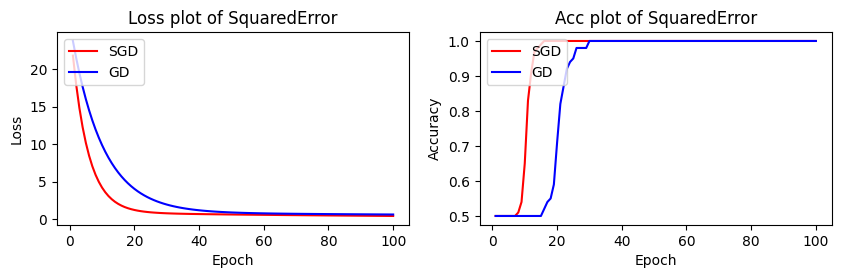

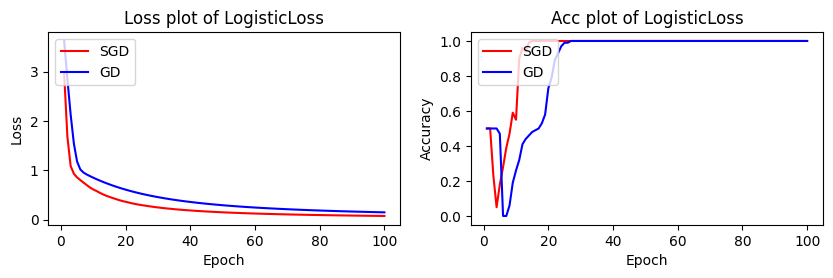

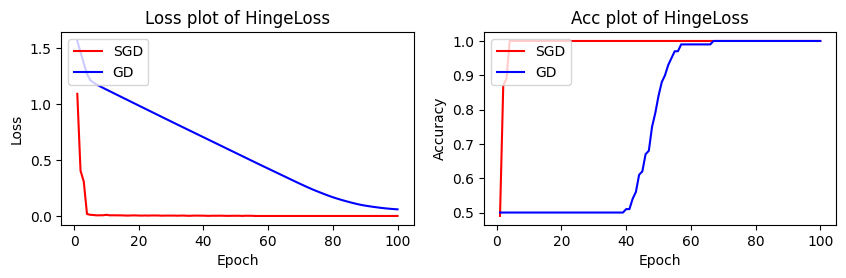

In [ ]:
# Code to run algorithm and plot the loss/accuracy
# Step sizes have been preselected to be reasonable
obj_func_arr = [SquaredError(), LogisticLoss(), HingeLoss()]
step_sizes = [
    [5e-4, 1e-4],
    [5e-2, 1e-2],
    [1e-2, 5e-2],
]

# Intialize random number generator
rng = np.random.RandomState(42)

for obj_func, step_size_arr in zip(obj_func_arr, step_sizes): # 0.005, 0.001 for SquaredError, LogisticLoss, HingeLoss
    print(f'======= {obj_func.__class__.__name__} =======')
    theta_init = rng.randn(D + 1)

    print(f'-> Running Gradient Descent')
    best_theta, obj_arr, acc_arr = optimize(
        theta_init, X, y, obj_func,
        step_size=step_size_arr[0], max_epoch=100, batch_size=None, rng = rng)
    print(f'\nBest theta: {best_theta}\n')

    print(f'-> Running Mini-Batch Gradient Descent (Batch Size = 10)')
    best_theta_sgd, obj_arr_sgd, acc_arr_sgd = optimize(
        theta_init, X, y, obj_func,
        step_size=step_size_arr[1], max_epoch=100, batch_size=10, rng = rng)
    print(f'\nBest theta_sgd: {best_theta_sgd}')
    print('')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2.5))
    ax1.set_title(f"Loss plot of {obj_func.__class__.__name__}")
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.plot(np.arange(1, len(obj_arr)+1), obj_arr_sgd, color ="red", label="SGD")
    ax1.plot(np.arange(1, len(obj_arr)+1), obj_arr, color ="blue", label="GD")
    ax1.legend(loc="upper left")
    ax2.set_title(f"Acc plot of {obj_func.__class__.__name__}")
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.plot(np.arange(1, len(acc_arr)+1), acc_arr_sgd, color ="red", label="SGD")
    ax2.plot(np.arange(1, len(acc_arr)+1), acc_arr, color ="blue", label="GD")
    ax2.legend(loc="upper left")